# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib.parse

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [47]:
import urllib.parse
import requests
import time

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={urllib.parse.quote(city)}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        # Parse the JSON and retrieve data
        if response.status_code == 200:
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

            # Append the City information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
        else:
            print(f"Weather data for {city} not found. Status code: {response.status_code}, Response: {response.text}")
    except Exception as e:
        # If an error is experienced, skip the city
        print(f"City not found. Skipping... Error: {str(e)}")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | tobi village
Weather data for tobi village not found. Status code: 404, Response: {"cod":"404","message":"city not found"}
Processing Record 5 of Set 1 | fortuna foothills
Processing Record 6 of Set 1 | flying fish cove
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | tromso
Processing Record 9 of Set 1 | praia da vitoria
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | cargados carajos
Weather data for cargados carajos not found. Status code: 404, Response: {"cod":"404","message":"city not found"}
Processing Record 12 of Set 1 | hammerfest
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | villa gesell
Processing Record 15 of Set 1 | aral
Processing Record 16 of Set 1 | bredasdorp
Processin

In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [51]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,281.82,97,100,2.02,NZ,1727817900
1,grytviken,-54.2811,-36.5092,268.86,78,53,6.32,GS,1727817901
2,adamstown,-25.0660,-130.1015,292.88,66,96,5.04,PN,1727817902
3,fortuna foothills,32.6578,-114.4119,316.60,14,20,1.54,US,1727817905
4,flying fish cove,-10.4217,105.6791,297.97,94,100,4.12,CX,1727817906


In [53]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [55]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,281.82,97,100,2.02,NZ,1727817900
1,grytviken,-54.2811,-36.5092,268.86,78,53,6.32,GS,1727817901
2,adamstown,-25.0660,-130.1015,292.88,66,96,5.04,PN,1727817902
3,fortuna foothills,32.6578,-114.4119,316.60,14,20,1.54,US,1727817905
4,flying fish cove,-10.4217,105.6791,297.97,94,100,4.12,CX,1727817906


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

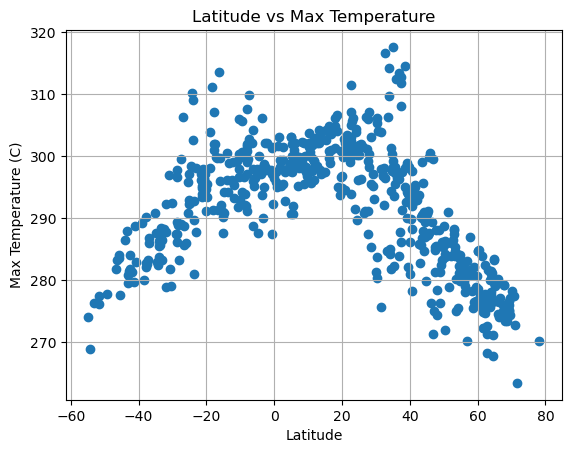

In [59]:
# Build scatter plot for Latitude vs. Temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"Latitude vs Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

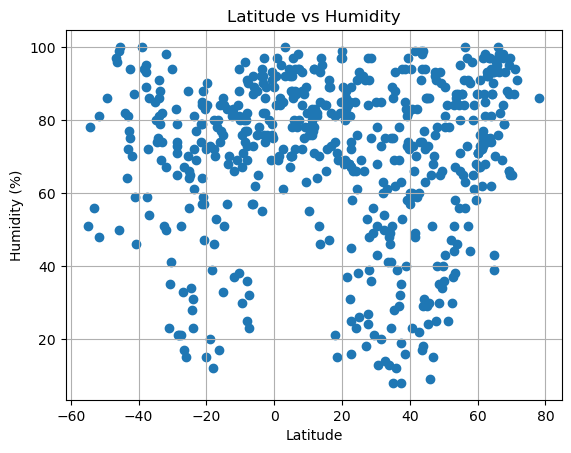

In [62]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

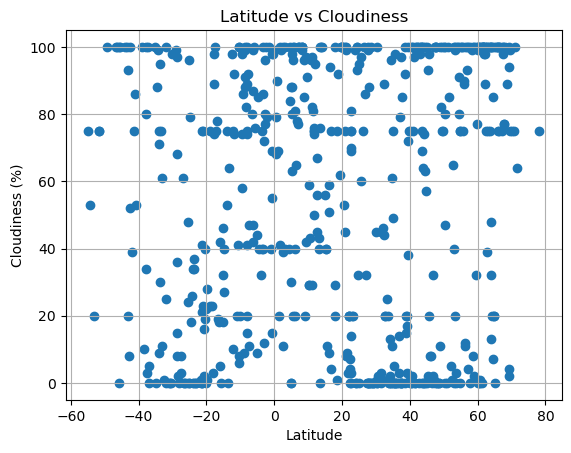

In [64]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

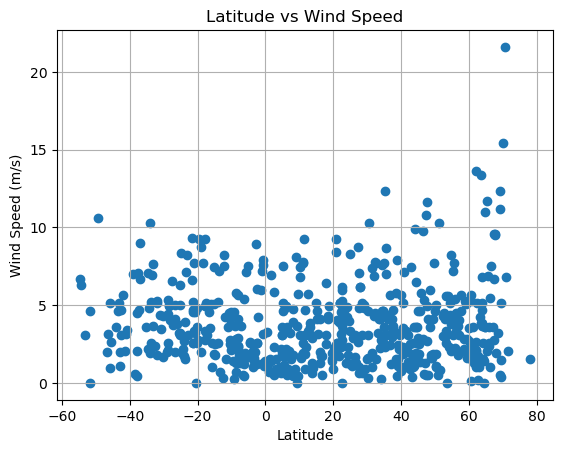

In [67]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [69]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, name, ylabel, hemi):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x* slope + intercept
    plt.plot(x, regress_values, color="r")
    plt.scatter(x,y)
    plt.title(f"Latitude vs. {ylabel}: {hemi}")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    line_formula = f"y = {(round(slope,2))}x + {(round(intercept,2))}"
    print(f"Linear equation: {line_formula}")
    plt.savefig(f"output_data/LinearRegresion_{name}.png")
    print(f"The r-value is: {rvalue}")

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,fortuna foothills,32.6578,-114.4119,316.60,14,20,1.54,US,1727817905
5,georgetown,5.4112,100.3354,300.11,87,20,1.03,MY,1727817907
6,tromso,69.6496,18.9570,277.16,65,75,5.14,NO,1727817908
7,praia da vitoria,38.7333,-27.0667,298.29,83,20,7.89,PT,1727817909
9,hammerfest,70.6634,23.6821,277.40,87,75,21.61,NO,1727817914


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,281.82,97,100,2.02,NZ,1727817900
1,grytviken,-54.2811,-36.5092,268.86,78,53,6.32,GS,1727817901
2,adamstown,-25.0660,-130.1015,292.88,66,96,5.04,PN,1727817902
4,flying fish cove,-10.4217,105.6791,297.97,94,100,4.12,CX,1727817906
8,waitangi,-43.9535,-176.5597,286.38,82,100,3.58,NZ,1727817911


###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.42x + 306.44
The r-value is: -0.786867975496376


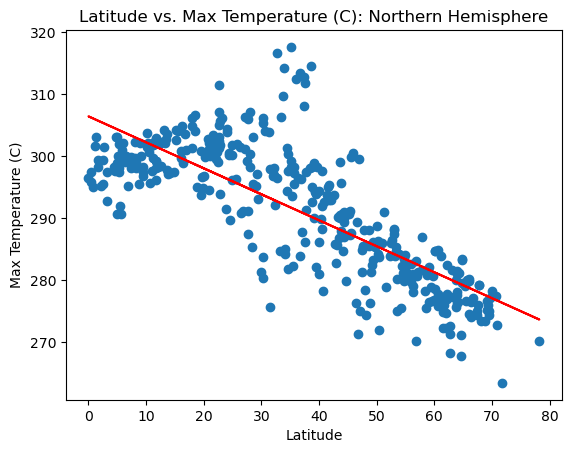

In [76]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],"north_lats_maxtemp", "Max Temperature (C)","Northern Hemisphere")
plt.show()

Linear equation: y = 0.42x + 302.02
The r-value is: 0.7276722947935211


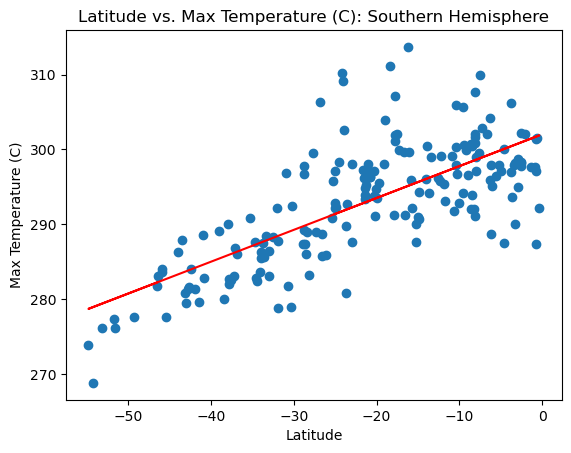

In [78]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],"south_lats_maxtemp", "Max Temperature (C)","Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE 

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = -0.02x + 70.95
The r-value is: -0.01354126109585717


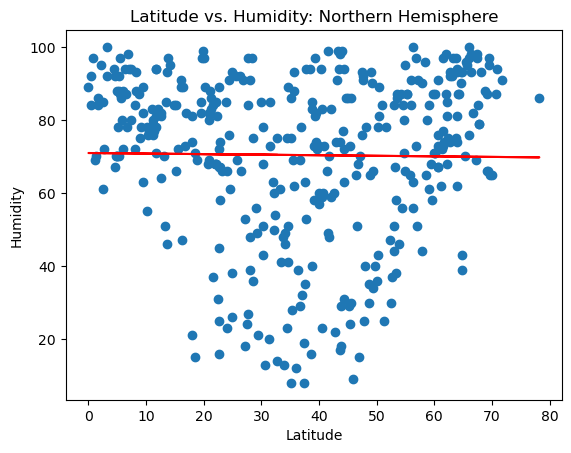

In [82]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],"north_lats_humidity", "Humidity","Northern Hemisphere")
plt.show()

Linear equation: y = 0.05x + 70.31
The r-value is: 0.029624446008847973


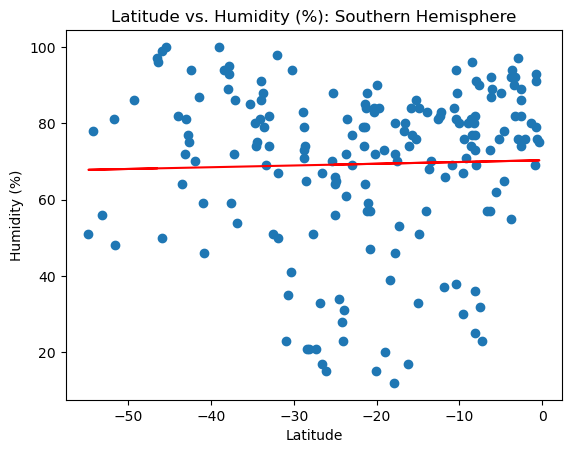

In [84]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],"south_lats_humidity", "Humidity (%)","Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.13x + 51.76
The r-value is: 0.06175416917747806


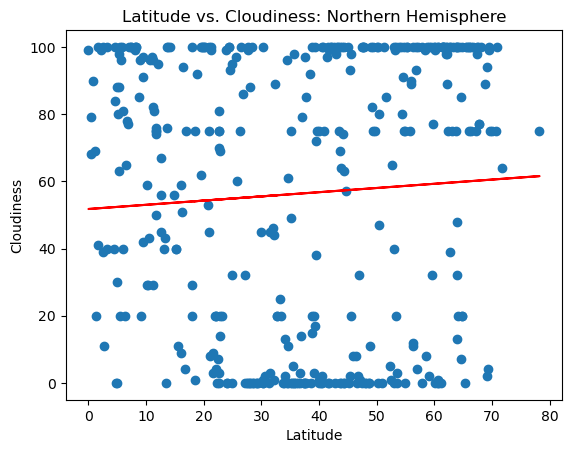

In [88]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],"north_lats_cloudiness", "Cloudiness","Northern Hemisphere")
plt.show()

Linear equation: y = 0.16x + 53.43
The r-value is: 0.06048406342957173


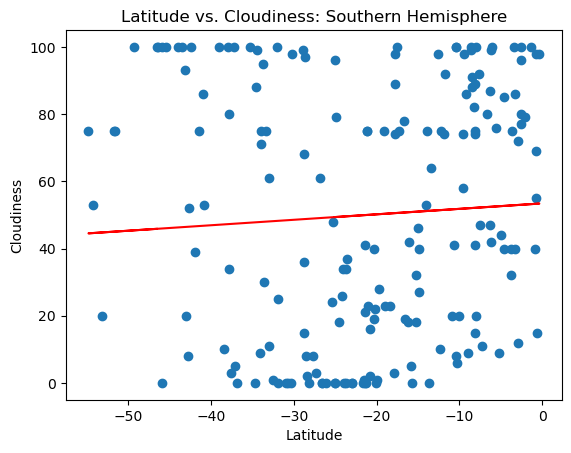

In [90]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],"southern_lats_cloudiness", "Cloudiness","Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.02x + 2.8
The r-value is: 0.16957648338351378


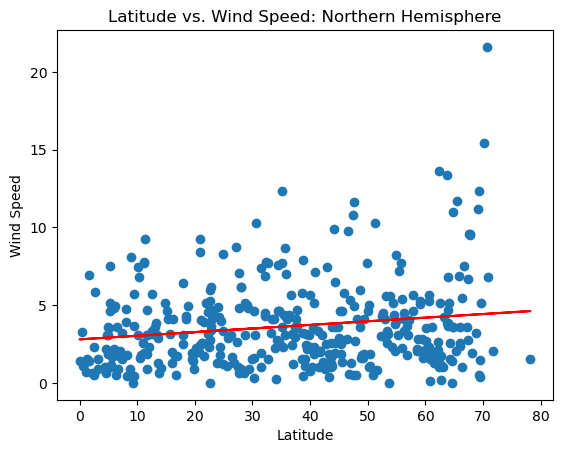

In [94]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],"north_lats_windspeed", "Wind Speed","Northern Hemisphere")
plt.show()

Linear equation: y = -0.02x + 3.36
The r-value is: -0.14031596704824692


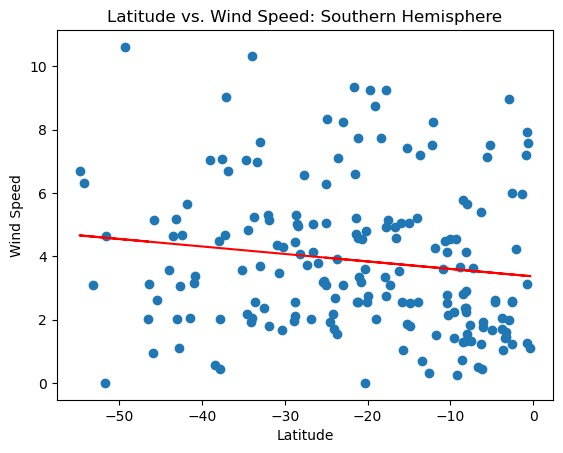

In [96]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],"south_lats_windspeed", "Wind Speed","Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [99]:
Although there does not appear to be a strong correlation between the axes, the Northern Hemisphere has a slight positive correlation while the Southern Hemisphere has a slight negative correlation. As opposed to the previous graphs displayed, the data points here appear to be much closer to the line of linear regression.

SyntaxError: invalid syntax (3190498918.py, line 1)